      shear    age
0   2160.70  15.50
1   1680.15  23.75
2   2318.00   8.00
3   2063.30  17.00
4   2209.30   5.50
5   2209.50  19.00
6   1710.30  24.00
7   1786.70   2.50
8   2577.90   7.50
9   2359.90  11.00
10  2258.70  13.00
11  2167.20   3.75
12  2401.55  25.00
13  1781.80   9.75
14  2338.75  22.00
15  1767.30  18.00
16  2055.50   6.00
17  2416.40  12.50
18  2202.50   2.00
19  2656.20  21.50
20  1755.70   0.00
                            OLS Regression Results                            
Dep. Variable:                  shear   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                   0.08191
Date:                Thu, 28 Aug 2025   Prob (F-statistic):              0.778
Time:                        11:55:42   Log-Likelihood:                -148.42
No. Observations:                  21   AIC:                             300.8
Df Residuals:                

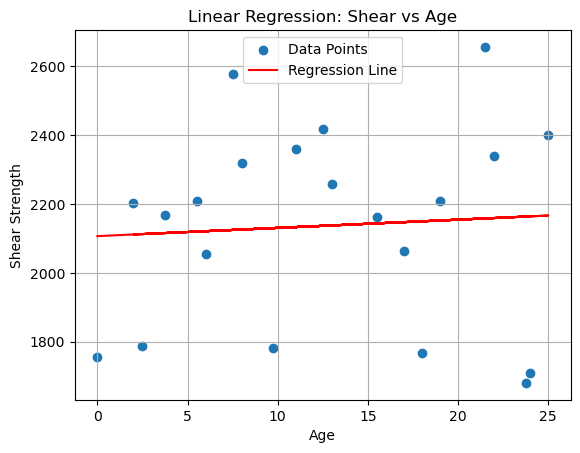

In [2]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define data
data = {
    "shear": [2160.70, 1680.15, 2318.00, 2063.30, 2209.30, 2209.50, 1710.30, 1786.70,
              2577.90, 2359.90, 2258.70, 2167.20, 2401.55, 1781.80, 2338.75, 1767.30,
              2055.50, 2416.40, 2202.50, 2656.20, 1755.70],
    "age": [15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50, 7.50, 11.00, 13.00,
            3.75, 25.00, 9.75, 22.00, 18.00, 6.00, 12.50, 2.00, 21.50, 0.00]
}

# Create DataFrame
df = pd.DataFrame(data)
print(df)

# Define dependent and independent variables
y = df['shear']
X = df['age']
X = sm.add_constant(X)  # Add intercept term

# Fit the model
linear_regression = sm.OLS(y, X)
fitted_model = linear_regression.fit()

# Display the summary
print(fitted_model.summary())

# Extract parameters
intercept = fitted_model.params['const']
slope = fitted_model.params['age']
print("\nIntercept:", intercept)
print("Slope:", slope)

# Optional: Plot
plt.scatter(df['age'], df['shear'], label='Data Points')
plt.plot(df['age'], intercept + slope * df['age'], color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Shear Strength')
plt.title('Linear Regression: Shear vs Age')
plt.legend()
plt.grid(True)
plt.show()

Intercept: 2106.5905740169997
Slope: 2.3908248667652043


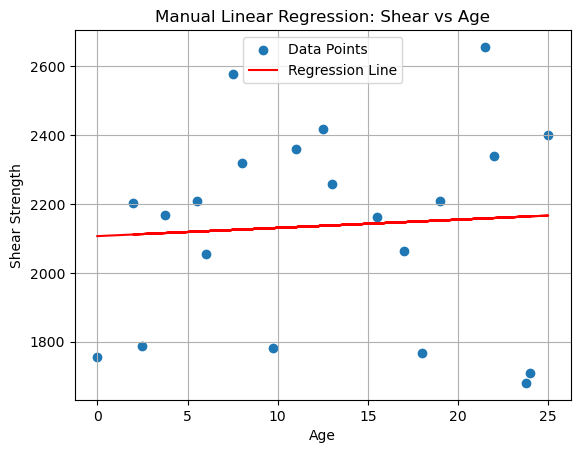

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {
    "shear": [2160.70, 1680.15, 2318.00, 2063.30, 2209.30, 2209.50, 1710.30, 1786.70,
              2577.90, 2359.90, 2258.70, 2167.20, 2401.55, 1781.80, 2338.75, 1767.30,
              2055.50, 2416.40, 2202.50, 2656.20, 1755.70],
    "age": [15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50, 7.50, 11.00, 13.00,
            3.75, 25.00, 9.75, 22.00, 18.00, 6.00, 12.50, 2.00, 21.50, 0.00]
}

# Create DataFrame
df = pd.DataFrame(data)

# Extract variables
x = df['age'].values
y = df['shear'].values

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate slope (b1)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
slope = numerator / denominator

# Calculate intercept (b0)
intercept = y_mean - slope * x_mean

print("Intercept:", intercept)
print("Slope:", slope)

# Predict y values
y_pred = intercept + slope * x

# Plotting
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Shear Strength')
plt.title('Manual Linear Regression: Shear vs Age')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def gradient_descent (X ,y , initial_learning_rate = 0.01 , decay_rate = 0.01 , n_iterations = 1000):
    m = len(y)
    theta = np.random.randn(2)
    for iteration in range (n_iterations ):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        learning_rate = initial_learning_rate / (1+decay_rate * iteration )
        theta -= learning_rate * gradients
        error  = np.mean((X.dot(theta)-y)**2)
        if error >0.1:
            iteration +=1
        break
    return gradients
    return theta 
theta_gd = gradient_descent(X,y)
print("\nGradient Descent :")
print(F"Intercept:{theta_gd[0]} , slope:{theta_gd[1]}")



Gradient Descent :
Intercept:-4290.362925339927 , slope:-54971.97656456067


C:\Users\Admin\AppData\Local\Temp\ipykernel_5672\2171822250.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(F"Intercept:{theta_gd[0]} , slope:{theta_gd[1]}")


In [10]:
def stochastic_gradient_descent(X,y,learning_rate = 0.001 , n_iterations  = 1000):
    m = len(y)
    theta = np.array([3000,-0.1])
    for iterations in range (n_iterations ):
        for i in range (m):
            random_index = np.random.randint(m)
            x1 = X[random_index : random_index+1]
            y1 = y[random_index : random_index+1]
            gradients = (2/m) *x1.T.dot(x1.dot(theta) - y1)
            theta  -= learning_rate * gradients
    return gradients
    return theta 
theta_sgd  = stochastic_gradient_descent(X,y)
print("\nstochastic gradient descent")
print(f"Intercept :{theta_sgd[0]} , slope :{theta_sgd[1]}")


stochastic gradient descent
Intercept :-59.014369167314335 , slope :-1268.8089370972582


C:\Users\Admin\AppData\Local\Temp\ipykernel_5672\1518032874.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept :{theta_sgd[0]} , slope :{theta_sgd[1]}")


In [13]:
feature_1 = np.linspace(0, 25, 100)
feature_2 = np.zeros(100)
X_values = np.column_stack((feature_1, feature_2))
y_pred = sgd_reg.predict(X_values)
print("predictions:", y_pred)


predictions: [  644.98957452   807.85087643   970.71217834  1133.57348025
  1296.43478216  1459.29608406  1622.15738597  1785.01868788
  1947.87998979  2110.7412917   2273.60259361  2436.46389552
  2599.32519743  2762.18649934  2925.04780125  3087.90910316
  3250.77040507  3413.63170697  3576.49300888  3739.35431079
  3902.2156127   4065.07691461  4227.93821652  4390.79951843
  4553.66082034  4716.52212225  4879.38342416  5042.24472607
  5205.10602798  5367.96732989  5530.82863179  5693.6899337
  5856.55123561  6019.41253752  6182.27383943  6345.13514134
  6507.99644325  6670.85774516  6833.71904707  6996.58034898
  7159.44165089  7322.3029528   7485.1642547   7648.02555661
  7810.88685852  7973.74816043  8136.60946234  8299.47076425
  8462.33206616  8625.19336807  8788.05466998  8950.91597189
  9113.7772738   9276.63857571  9439.49987761  9602.36117952
  9765.22248143  9928.08378334 10090.94508525 10253.80638716
 10416.66768907 10579.52899098 10742.39029289 10905.2515948
 11068.112896

C:\Users\Admin\.jupyter\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [14]:
feature_1 = np.linspace(0, 25, 100)
feature_2 = np.linspace(10, 20, 100) 
X_values = np.column_stack((feature_1, feature_2))
y_pred = sgd_reg.predict(X_values)
print("predictions:", y_pred)


predictions: [ 1385.68732107  1556.0304184   1726.37351573  1896.71661306
  2067.05971039  2237.40280772  2407.74590505  2578.08900238
  2748.4320997   2918.77519703  3089.11829436  3259.46139169
  3429.80448902  3600.14758635  3770.49068368  3940.83378101
  4111.17687834  4281.51997566  4451.86307299  4622.20617032
  4792.54926765  4962.89236498  5133.23546231  5303.57855964
  5473.92165697  5644.2647543   5814.60785162  5984.95094895
  6155.29404628  6325.63714361  6495.98024094  6666.32333827
  6836.6664356   7007.00953293  7177.35263026  7347.69572758
  7518.03882491  7688.38192224  7858.72501957  8029.0681169
  8199.41121423  8369.75431156  8540.09740889  8710.44050622
  8880.78360355  9051.12670087  9221.4697982   9391.81289553
  9562.15599286  9732.49909019  9902.84218752 10073.18528485
 10243.52838218 10413.87147951 10584.21457683 10754.55767416
 10924.90077149 11095.24386882 11265.58696615 11435.93006348
 11606.27316081 11776.61625814 11946.95935547 12117.30245279
 12287.64555

C:\Users\Admin\.jupyter\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
